# Version

In [1]:
i = 2 #moons

# Import python dataset

In [2]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model, load_model


import random

import sys
sys.path.append("..")

import dataset,network

# Load Data

In [3]:
# Preprocessing

scenario= "moons" #sinus, helix
#n_instance = 1000
n_instance = 1000
n_features = 2
Z = 6 #3的倍數
nodes = 4 #4
var = 2
use_bias = 'True'
scales = ['-1-1','0-1']
scaled = '-1-1'

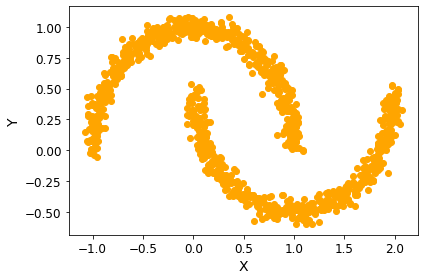

In [4]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [5]:
#storage data
os.system('mkdir Dataset')
os.system('mkdir AAE')
os.system('mkdir AAE/Models')
os.system('mkdir AAE/Losses')
os.system('mkdir AAE/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')
print('made dataset')

made dataset


# AAE

### Architecture

In [6]:
encoder=network.build_encoder(Z, nodes, n_features)
decoder=network.build_decoder(Z, var, n_features)
discriminator=network.build_discriminator(Z, nodes)
discriminator.summary()

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           128         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 64)           256         dense[0][0]                      
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 64)           0           batch_normalization[0][0]        
____________________________________________________________________________________________

### Preprocessing

In [7]:
import AAE_Model

GANorWGAN='GAN' #GAN
epochs = 2000 #2000
batch_size = 100

In [8]:
aae = AAE_Model.AAE(i, Z, n_features, batch_size, GANorWGAN, nodes, var, use_bias)

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 64)           128         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 64)           256         dense_11[0][0]                   
__________________________________________________________________________________________________
re_lu_9 (ReLU)                  (None, 64)           0           batch_normalization_14[0][0]     
____________________________________________________________________________________________

In [9]:
train_dataset, scaler, X_train_scaled = aae.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)


data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (100, 2)
Cycles:  10
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)


### latent variable

## Training

1 [D real: 0.358125, D fake: 1.474873], [Enc/Dec loss: 0.854262, Enc/Dis: 0.848726]
2 [D real: 0.360036, D fake: 1.443757], [Enc/Dec loss: 0.667462, Enc/Dis: 0.661671]
3 [D real: 0.361299, D fake: 1.415528], [Enc/Dec loss: 0.519619, Enc/Dis: 0.513637]
4 [D real: 0.365416, D fake: 1.407381], [Enc/Dec loss: 0.455090, Enc/Dis: 0.448984]
5 [D real: 0.372764, D fake: 1.386381], [Enc/Dec loss: 0.393642, Enc/Dis: 0.387493]
6 [D real: 0.374208, D fake: 1.378130], [Enc/Dec loss: 0.339533, Enc/Dis: 0.333351]
7 [D real: 0.378038, D fake: 1.369156], [Enc/Dec loss: 0.327213, Enc/Dis: 0.321054]
8 [D real: 0.380746, D fake: 1.352598], [Enc/Dec loss: 0.298310, Enc/Dis: 0.292132]
9 [D real: 0.382740, D fake: 1.339973], [Enc/Dec loss: 0.269181, Enc/Dis: 0.263036]
10 [D real: 0.386970, D fake: 1.322001], [Enc/Dec loss: 0.252472, Enc/Dis: 0.246265]
11 [D real: 0.444248, D fake: 1.183007], [Enc/Dec loss: 0.238898, Enc/Dis: 0.232697]
12 [D real: 0.436710, D fake: 1.137932], [Enc/Dec loss: 0.225150, Enc/Dis:

96 [D real: 0.685571, D fake: 0.713733], [Enc/Dec loss: 0.110530, Enc/Dis: 0.101339]
97 [D real: 0.686571, D fake: 0.714579], [Enc/Dec loss: 0.098473, Enc/Dis: 0.088575]
98 [D real: 0.683215, D fake: 0.714536], [Enc/Dec loss: 0.103152, Enc/Dis: 0.094043]
99 [D real: 0.687927, D fake: 0.712490], [Enc/Dec loss: 0.110869, Enc/Dis: 0.102663]
100 [D real: 0.688894, D fake: 0.714404], [Enc/Dec loss: 0.106499, Enc/Dis: 0.095497]
101 [D real: 0.713604, D fake: 0.735196], [Enc/Dec loss: 0.097054, Enc/Dis: 0.088935]
102 [D real: 0.695464, D fake: 0.727531], [Enc/Dec loss: 0.103671, Enc/Dis: 0.093708]
103 [D real: 0.691947, D fake: 0.720357], [Enc/Dec loss: 0.098954, Enc/Dis: 0.090465]
104 [D real: 0.692973, D fake: 0.723393], [Enc/Dec loss: 0.099575, Enc/Dis: 0.089104]
105 [D real: 0.691770, D fake: 0.724465], [Enc/Dec loss: 0.102976, Enc/Dis: 0.090136]
106 [D real: 0.690092, D fake: 0.721536], [Enc/Dec loss: 0.104515, Enc/Dis: 0.097754]
107 [D real: 0.682467, D fake: 0.721329], [Enc/Dec loss: 0

192 [D real: 0.701908, D fake: 0.707421], [Enc/Dec loss: 0.089736, Enc/Dis: 0.080344]
193 [D real: 0.697877, D fake: 0.702115], [Enc/Dec loss: 0.089723, Enc/Dis: 0.081771]
194 [D real: 0.708047, D fake: 0.701022], [Enc/Dec loss: 0.100137, Enc/Dis: 0.090775]
195 [D real: 0.701988, D fake: 0.695222], [Enc/Dec loss: 0.097373, Enc/Dis: 0.090639]
196 [D real: 0.702103, D fake: 0.691465], [Enc/Dec loss: 0.089561, Enc/Dis: 0.086021]
197 [D real: 0.702006, D fake: 0.692152], [Enc/Dec loss: 0.091401, Enc/Dis: 0.086669]
198 [D real: 0.699024, D fake: 0.691585], [Enc/Dec loss: 0.098484, Enc/Dis: 0.090984]
199 [D real: 0.698359, D fake: 0.687780], [Enc/Dec loss: 0.094568, Enc/Dis: 0.086010]
200 [D real: 0.696705, D fake: 0.687019], [Enc/Dec loss: 0.096562, Enc/Dis: 0.088933]
201 [D real: 0.692825, D fake: 0.676540], [Enc/Dec loss: 0.091451, Enc/Dis: 0.084137]
202 [D real: 0.698705, D fake: 0.682092], [Enc/Dec loss: 0.091335, Enc/Dis: 0.081956]
203 [D real: 0.700779, D fake: 0.687222], [Enc/Dec los

288 [D real: 0.649879, D fake: 0.636795], [Enc/Dec loss: 0.092087, Enc/Dis: 0.082877]
289 [D real: 0.645649, D fake: 0.634524], [Enc/Dec loss: 0.085917, Enc/Dis: 0.077598]
290 [D real: 0.646219, D fake: 0.636096], [Enc/Dec loss: 0.084426, Enc/Dis: 0.078404]
291 [D real: 0.670894, D fake: 0.620525], [Enc/Dec loss: 0.090372, Enc/Dis: 0.084600]
292 [D real: 0.702356, D fake: 0.629882], [Enc/Dec loss: 0.092741, Enc/Dis: 0.086700]
293 [D real: 0.685580, D fake: 0.631781], [Enc/Dec loss: 0.090207, Enc/Dis: 0.084892]
294 [D real: 0.669073, D fake: 0.630763], [Enc/Dec loss: 0.081261, Enc/Dis: 0.077048]
295 [D real: 0.664900, D fake: 0.631053], [Enc/Dec loss: 0.083361, Enc/Dis: 0.078441]
296 [D real: 0.666144, D fake: 0.633158], [Enc/Dec loss: 0.093001, Enc/Dis: 0.087749]
297 [D real: 0.664493, D fake: 0.630934], [Enc/Dec loss: 0.096001, Enc/Dis: 0.091786]
298 [D real: 0.666817, D fake: 0.639800], [Enc/Dec loss: 0.096706, Enc/Dis: 0.090232]
299 [D real: 0.663471, D fake: 0.641619], [Enc/Dec los

384 [D real: 0.594071, D fake: 0.564545], [Enc/Dec loss: 0.090359, Enc/Dis: 0.078130]
385 [D real: 0.588502, D fake: 0.557051], [Enc/Dec loss: 0.095369, Enc/Dis: 0.084380]
386 [D real: 0.594980, D fake: 0.559274], [Enc/Dec loss: 0.094782, Enc/Dis: 0.091226]
387 [D real: 0.599877, D fake: 0.557793], [Enc/Dec loss: 0.081242, Enc/Dis: 0.078445]
388 [D real: 0.601196, D fake: 0.557265], [Enc/Dec loss: 0.081127, Enc/Dis: 0.078188]
389 [D real: 0.592394, D fake: 0.564471], [Enc/Dec loss: 0.083213, Enc/Dis: 0.079683]
390 [D real: 0.585989, D fake: 0.561353], [Enc/Dec loss: 0.084190, Enc/Dis: 0.080773]
391 [D real: 0.561737, D fake: 0.557649], [Enc/Dec loss: 0.078802, Enc/Dis: 0.075606]
392 [D real: 0.546109, D fake: 0.556567], [Enc/Dec loss: 0.084464, Enc/Dis: 0.080854]
393 [D real: 0.560854, D fake: 0.547596], [Enc/Dec loss: 0.079438, Enc/Dis: 0.075066]
394 [D real: 0.577594, D fake: 0.533100], [Enc/Dec loss: 0.080470, Enc/Dis: 0.076212]
395 [D real: 0.576325, D fake: 0.540264], [Enc/Dec los

480 [D real: 0.501601, D fake: 0.455455], [Enc/Dec loss: 0.092127, Enc/Dis: 0.089090]
481 [D real: 0.515038, D fake: 0.460742], [Enc/Dec loss: 0.086730, Enc/Dis: 0.083966]
482 [D real: 0.474221, D fake: 0.476418], [Enc/Dec loss: 0.081307, Enc/Dis: 0.078439]
483 [D real: 0.474459, D fake: 0.467240], [Enc/Dec loss: 0.083666, Enc/Dis: 0.080818]
484 [D real: 0.475627, D fake: 0.471460], [Enc/Dec loss: 0.079351, Enc/Dis: 0.076604]
485 [D real: 0.478167, D fake: 0.461788], [Enc/Dec loss: 0.081033, Enc/Dis: 0.078572]
486 [D real: 0.475667, D fake: 0.458645], [Enc/Dec loss: 0.077682, Enc/Dis: 0.074768]
487 [D real: 0.476019, D fake: 0.467415], [Enc/Dec loss: 0.087393, Enc/Dis: 0.084494]
488 [D real: 0.481414, D fake: 0.467491], [Enc/Dec loss: 0.082307, Enc/Dis: 0.079892]
489 [D real: 0.482037, D fake: 0.465076], [Enc/Dec loss: 0.084168, Enc/Dis: 0.081740]
490 [D real: 0.475583, D fake: 0.460639], [Enc/Dec loss: 0.093247, Enc/Dis: 0.079720]
491 [D real: 0.459364, D fake: 0.455469], [Enc/Dec los

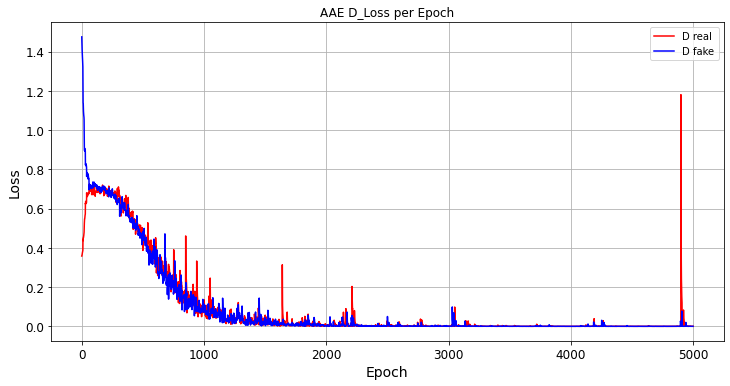

G_Loss: 


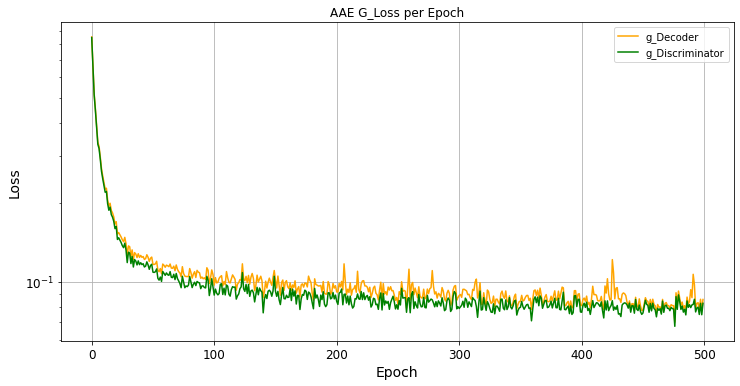

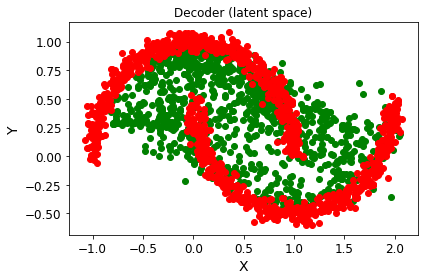

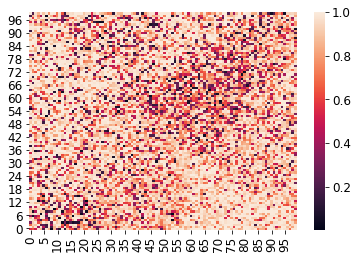

501 [D real: 0.386865, D fake: 0.438970], [Enc/Dec loss: 0.089807, Enc/Dis: 0.086747]
502 [D real: 0.404620, D fake: 0.481347], [Enc/Dec loss: 0.082496, Enc/Dis: 0.079653]
503 [D real: 0.417968, D fake: 0.483502], [Enc/Dec loss: 0.083071, Enc/Dis: 0.080248]
504 [D real: 0.426248, D fake: 0.459189], [Enc/Dec loss: 0.074015, Enc/Dis: 0.071598]
505 [D real: 0.443414, D fake: 0.465897], [Enc/Dec loss: 0.081378, Enc/Dis: 0.078770]
506 [D real: 0.448123, D fake: 0.452231], [Enc/Dec loss: 0.078180, Enc/Dis: 0.075775]
507 [D real: 0.439504, D fake: 0.449005], [Enc/Dec loss: 0.082438, Enc/Dis: 0.080144]
508 [D real: 0.435697, D fake: 0.446538], [Enc/Dec loss: 0.080595, Enc/Dis: 0.078677]
509 [D real: 0.438551, D fake: 0.448580], [Enc/Dec loss: 0.084190, Enc/Dis: 0.082136]
510 [D real: 0.429842, D fake: 0.438870], [Enc/Dec loss: 0.086616, Enc/Dis: 0.084534]
511 [D real: 0.427082, D fake: 0.499091], [Enc/Dec loss: 0.081622, Enc/Dis: 0.078522]
512 [D real: 0.460689, D fake: 0.459101], [Enc/Dec los

597 [D real: 0.363514, D fake: 0.374723], [Enc/Dec loss: 0.082705, Enc/Dis: 0.080816]
598 [D real: 0.367074, D fake: 0.367151], [Enc/Dec loss: 0.093021, Enc/Dis: 0.091470]
599 [D real: 0.364836, D fake: 0.354904], [Enc/Dec loss: 0.074193, Enc/Dis: 0.072166]
600 [D real: 0.369139, D fake: 0.341979], [Enc/Dec loss: 0.084620, Enc/Dis: 0.082655]
601 [D real: 0.316741, D fake: 0.405467], [Enc/Dec loss: 0.075273, Enc/Dis: 0.073715]
602 [D real: 0.396707, D fake: 0.326253], [Enc/Dec loss: 0.082650, Enc/Dis: 0.080945]
603 [D real: 0.423259, D fake: 0.301910], [Enc/Dec loss: 0.084882, Enc/Dis: 0.083278]
604 [D real: 0.422531, D fake: 0.316874], [Enc/Dec loss: 0.074627, Enc/Dis: 0.072801]
605 [D real: 0.451603, D fake: 0.319229], [Enc/Dec loss: 0.084103, Enc/Dis: 0.081982]
606 [D real: 0.440854, D fake: 0.316541], [Enc/Dec loss: 0.082629, Enc/Dis: 0.080533]
607 [D real: 0.425172, D fake: 0.321822], [Enc/Dec loss: 0.075828, Enc/Dis: 0.073940]
608 [D real: 0.420258, D fake: 0.317769], [Enc/Dec los

693 [D real: 0.290314, D fake: 0.214325], [Enc/Dec loss: 0.086301, Enc/Dis: 0.085256]
694 [D real: 0.270948, D fake: 0.208665], [Enc/Dec loss: 0.081708, Enc/Dis: 0.080652]
695 [D real: 0.260577, D fake: 0.220131], [Enc/Dec loss: 0.075398, Enc/Dis: 0.074256]
696 [D real: 0.265878, D fake: 0.228215], [Enc/Dec loss: 0.081463, Enc/Dis: 0.080395]
697 [D real: 0.272973, D fake: 0.221291], [Enc/Dec loss: 0.073554, Enc/Dis: 0.072395]
698 [D real: 0.262394, D fake: 0.229262], [Enc/Dec loss: 0.085807, Enc/Dis: 0.084694]
699 [D real: 0.268436, D fake: 0.235274], [Enc/Dec loss: 0.082002, Enc/Dis: 0.080841]
700 [D real: 0.262373, D fake: 0.247720], [Enc/Dec loss: 0.079526, Enc/Dis: 0.078097]
701 [D real: 0.221394, D fake: 0.161746], [Enc/Dec loss: 0.085458, Enc/Dis: 0.084228]
702 [D real: 0.276500, D fake: 0.196376], [Enc/Dec loss: 0.080311, Enc/Dis: 0.079301]
703 [D real: 0.258316, D fake: 0.197531], [Enc/Dec loss: 0.088008, Enc/Dis: 0.086814]
704 [D real: 0.272340, D fake: 0.201995], [Enc/Dec los

789 [D real: 0.206293, D fake: 0.158072], [Enc/Dec loss: 0.086146, Enc/Dis: 0.085466]
790 [D real: 0.227360, D fake: 0.155112], [Enc/Dec loss: 0.081302, Enc/Dis: 0.080458]
791 [D real: 0.121511, D fake: 0.153324], [Enc/Dec loss: 0.084928, Enc/Dis: 0.084056]
792 [D real: 0.120970, D fake: 0.199004], [Enc/Dec loss: 0.077091, Enc/Dis: 0.076236]
793 [D real: 0.165168, D fake: 0.188069], [Enc/Dec loss: 0.080476, Enc/Dis: 0.079654]
794 [D real: 0.169586, D fake: 0.203845], [Enc/Dec loss: 0.071447, Enc/Dis: 0.070660]
795 [D real: 0.155261, D fake: 0.197431], [Enc/Dec loss: 0.082115, Enc/Dis: 0.081234]
796 [D real: 0.149451, D fake: 0.202418], [Enc/Dec loss: 0.078402, Enc/Dis: 0.077779]
797 [D real: 0.153283, D fake: 0.211105], [Enc/Dec loss: 0.080065, Enc/Dis: 0.079158]
798 [D real: 0.163311, D fake: 0.212900], [Enc/Dec loss: 0.086825, Enc/Dis: 0.085905]
799 [D real: 0.156537, D fake: 0.205631], [Enc/Dec loss: 0.080649, Enc/Dis: 0.079567]
800 [D real: 0.154407, D fake: 0.209314], [Enc/Dec los

885 [D real: 0.125032, D fake: 0.103524], [Enc/Dec loss: 0.081210, Enc/Dis: 0.080543]
886 [D real: 0.133803, D fake: 0.099306], [Enc/Dec loss: 0.076973, Enc/Dis: 0.076248]
887 [D real: 0.146339, D fake: 0.110596], [Enc/Dec loss: 0.085043, Enc/Dis: 0.084280]
888 [D real: 0.136120, D fake: 0.119870], [Enc/Dec loss: 0.079939, Enc/Dis: 0.079188]
889 [D real: 0.132044, D fake: 0.119647], [Enc/Dec loss: 0.073641, Enc/Dis: 0.073002]
890 [D real: 0.139467, D fake: 0.120905], [Enc/Dec loss: 0.079244, Enc/Dis: 0.078568]
891 [D real: 0.138702, D fake: 0.168462], [Enc/Dec loss: 0.079442, Enc/Dis: 0.078697]
892 [D real: 0.111371, D fake: 0.174912], [Enc/Dec loss: 0.074843, Enc/Dis: 0.073965]
893 [D real: 0.153606, D fake: 0.178214], [Enc/Dec loss: 0.082219, Enc/Dis: 0.081395]
894 [D real: 0.151997, D fake: 0.153786], [Enc/Dec loss: 0.077327, Enc/Dis: 0.076478]
895 [D real: 0.149173, D fake: 0.138630], [Enc/Dec loss: 0.080376, Enc/Dis: 0.079643]
896 [D real: 0.151139, D fake: 0.131692], [Enc/Dec los

981 [D real: 0.049178, D fake: 0.071483], [Enc/Dec loss: 0.080244, Enc/Dis: 0.079530]
982 [D real: 0.079978, D fake: 0.079698], [Enc/Dec loss: 0.078357, Enc/Dis: 0.077641]
983 [D real: 0.079602, D fake: 0.087196], [Enc/Dec loss: 0.079932, Enc/Dis: 0.079329]
984 [D real: 0.087788, D fake: 0.077470], [Enc/Dec loss: 0.076843, Enc/Dis: 0.076100]
985 [D real: 0.097221, D fake: 0.074018], [Enc/Dec loss: 0.081433, Enc/Dis: 0.080722]
986 [D real: 0.108641, D fake: 0.085574], [Enc/Dec loss: 0.075191, Enc/Dis: 0.074381]
987 [D real: 0.103342, D fake: 0.091298], [Enc/Dec loss: 0.080959, Enc/Dis: 0.080508]
988 [D real: 0.098387, D fake: 0.104192], [Enc/Dec loss: 0.074318, Enc/Dis: 0.073716]
989 [D real: 0.100873, D fake: 0.097088], [Enc/Dec loss: 0.078835, Enc/Dis: 0.078309]
990 [D real: 0.097378, D fake: 0.108163], [Enc/Dec loss: 0.079483, Enc/Dis: 0.078931]
991 [D real: 0.092920, D fake: 0.137419], [Enc/Dec loss: 0.078433, Enc/Dis: 0.077915]
992 [D real: 0.079372, D fake: 0.130294], [Enc/Dec los

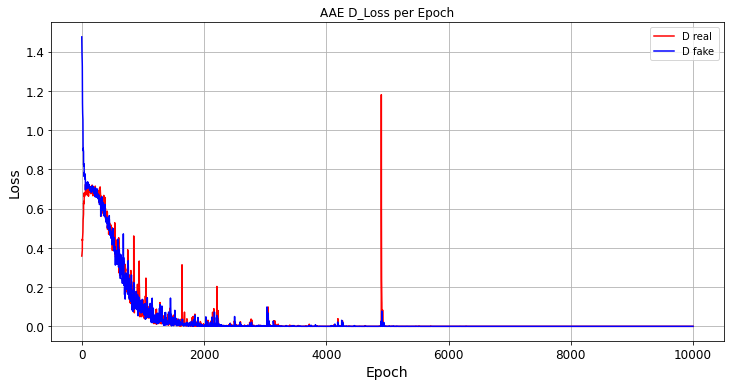

G_Loss: 


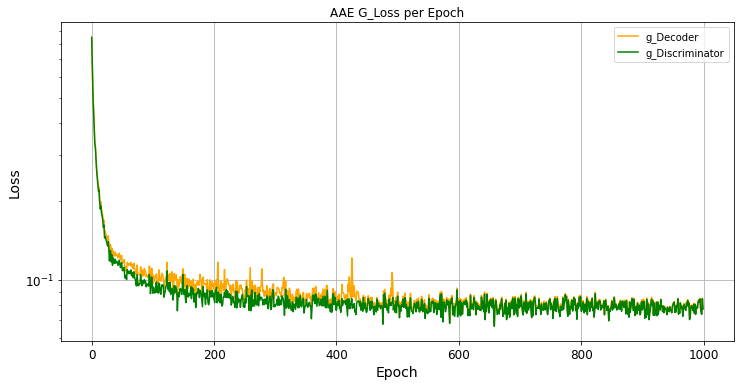

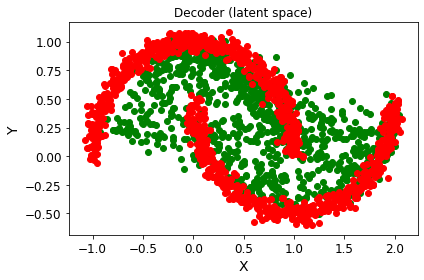

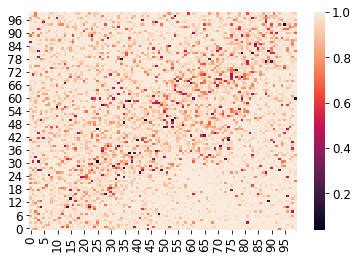

1001 [D real: 0.110613, D fake: 0.073155], [Enc/Dec loss: 0.075645, Enc/Dis: 0.075152]
1002 [D real: 0.135001, D fake: 0.097280], [Enc/Dec loss: 0.081278, Enc/Dis: 0.080856]
1003 [D real: 0.112337, D fake: 0.112168], [Enc/Dec loss: 0.078628, Enc/Dis: 0.078179]
1004 [D real: 0.101579, D fake: 0.094674], [Enc/Dec loss: 0.078667, Enc/Dis: 0.078259]
1005 [D real: 0.108635, D fake: 0.102385], [Enc/Dec loss: 0.084595, Enc/Dis: 0.084133]
1006 [D real: 0.095981, D fake: 0.090782], [Enc/Dec loss: 0.074926, Enc/Dis: 0.074879]
1007 [D real: 0.098836, D fake: 0.100481], [Enc/Dec loss: 0.079285, Enc/Dis: 0.079260]
1008 [D real: 0.088897, D fake: 0.102339], [Enc/Dec loss: 0.077516, Enc/Dis: 0.077361]
1009 [D real: 0.084728, D fake: 0.102152], [Enc/Dec loss: 0.085549, Enc/Dis: 0.085069]
1010 [D real: 0.086094, D fake: 0.099857], [Enc/Dec loss: 0.078896, Enc/Dis: 0.077266]
1011 [D real: 0.062657, D fake: 0.105855], [Enc/Dec loss: 0.074410, Enc/Dis: 0.073316]
1012 [D real: 0.053170, D fake: 0.073922], 

1096 [D real: 0.050119, D fake: 0.082191], [Enc/Dec loss: 0.081598, Enc/Dis: 0.080376]
1097 [D real: 0.045730, D fake: 0.077511], [Enc/Dec loss: 0.074541, Enc/Dis: 0.073339]
1098 [D real: 0.043035, D fake: 0.069717], [Enc/Dec loss: 0.081522, Enc/Dis: 0.080427]
1099 [D real: 0.041053, D fake: 0.066409], [Enc/Dec loss: 0.078473, Enc/Dis: 0.077315]
1100 [D real: 0.041280, D fake: 0.061314], [Enc/Dec loss: 0.080085, Enc/Dis: 0.078873]
1101 [D real: 0.088256, D fake: 0.046013], [Enc/Dec loss: 0.080298, Enc/Dis: 0.079031]
1102 [D real: 0.067879, D fake: 0.048987], [Enc/Dec loss: 0.078937, Enc/Dis: 0.077774]
1103 [D real: 0.055038, D fake: 0.071549], [Enc/Dec loss: 0.078297, Enc/Dis: 0.077133]
1104 [D real: 0.073789, D fake: 0.057314], [Enc/Dec loss: 0.079228, Enc/Dis: 0.078088]
1105 [D real: 0.073399, D fake: 0.049815], [Enc/Dec loss: 0.074617, Enc/Dis: 0.073476]
1106 [D real: 0.066626, D fake: 0.046670], [Enc/Dec loss: 0.085164, Enc/Dis: 0.084086]
1107 [D real: 0.076008, D fake: 0.045869], 

1191 [D real: 0.032489, D fake: 0.030563], [Enc/Dec loss: 0.073669, Enc/Dis: 0.072293]
1192 [D real: 0.035501, D fake: 0.026096], [Enc/Dec loss: 0.075955, Enc/Dis: 0.074795]
1193 [D real: 0.034409, D fake: 0.025662], [Enc/Dec loss: 0.079317, Enc/Dis: 0.078356]
1194 [D real: 0.032950, D fake: 0.057558], [Enc/Dec loss: 0.080981, Enc/Dis: 0.080017]
1195 [D real: 0.033091, D fake: 0.051787], [Enc/Dec loss: 0.076837, Enc/Dis: 0.075919]
1196 [D real: 0.031718, D fake: 0.051702], [Enc/Dec loss: 0.078210, Enc/Dis: 0.077264]
1197 [D real: 0.029844, D fake: 0.046221], [Enc/Dec loss: 0.080468, Enc/Dis: 0.079360]
1198 [D real: 0.028603, D fake: 0.043035], [Enc/Dec loss: 0.070756, Enc/Dis: 0.069858]
1199 [D real: 0.027813, D fake: 0.039398], [Enc/Dec loss: 0.077716, Enc/Dis: 0.076914]
1200 [D real: 0.042722, D fake: 0.037572], [Enc/Dec loss: 0.078524, Enc/Dis: 0.077809]
1201 [D real: 0.026171, D fake: 0.021991], [Enc/Dec loss: 0.079000, Enc/Dis: 0.078123]
1202 [D real: 0.017283, D fake: 0.017678], 

1286 [D real: 0.051149, D fake: 0.046694], [Enc/Dec loss: 0.078919, Enc/Dis: 0.078324]
1287 [D real: 0.045836, D fake: 0.048224], [Enc/Dec loss: 0.075969, Enc/Dis: 0.075470]
1288 [D real: 0.042983, D fake: 0.043892], [Enc/Dec loss: 0.076618, Enc/Dis: 0.076019]
1289 [D real: 0.039341, D fake: 0.039757], [Enc/Dec loss: 0.082310, Enc/Dis: 0.081760]
1290 [D real: 0.039900, D fake: 0.037528], [Enc/Dec loss: 0.084374, Enc/Dis: 0.083760]
1291 [D real: 0.040585, D fake: 0.068891], [Enc/Dec loss: 0.073456, Enc/Dis: 0.072911]
1292 [D real: 0.023321, D fake: 0.043300], [Enc/Dec loss: 0.074333, Enc/Dis: 0.073745]
1293 [D real: 0.020093, D fake: 0.031967], [Enc/Dec loss: 0.080590, Enc/Dis: 0.079978]
1294 [D real: 0.030559, D fake: 0.025769], [Enc/Dec loss: 0.083904, Enc/Dis: 0.083283]
1295 [D real: 0.029260, D fake: 0.028058], [Enc/Dec loss: 0.076536, Enc/Dis: 0.075913]
1296 [D real: 0.025550, D fake: 0.029378], [Enc/Dec loss: 0.074532, Enc/Dis: 0.073946]
1297 [D real: 0.023895, D fake: 0.032694], 

1381 [D real: 0.009726, D fake: 0.006566], [Enc/Dec loss: 0.082171, Enc/Dis: 0.081653]
1382 [D real: 0.012243, D fake: 0.015267], [Enc/Dec loss: 0.080172, Enc/Dis: 0.079777]
1383 [D real: 0.031195, D fake: 0.035639], [Enc/Dec loss: 0.079819, Enc/Dis: 0.079412]
1384 [D real: 0.031556, D fake: 0.030350], [Enc/Dec loss: 0.077837, Enc/Dis: 0.077321]
1385 [D real: 0.029515, D fake: 0.025287], [Enc/Dec loss: 0.072802, Enc/Dis: 0.072338]
1386 [D real: 0.029884, D fake: 0.022545], [Enc/Dec loss: 0.084572, Enc/Dis: 0.084202]
1387 [D real: 0.029125, D fake: 0.020831], [Enc/Dec loss: 0.081199, Enc/Dis: 0.080732]
1388 [D real: 0.026755, D fake: 0.018769], [Enc/Dec loss: 0.077109, Enc/Dis: 0.076693]
1389 [D real: 0.027675, D fake: 0.018854], [Enc/Dec loss: 0.084648, Enc/Dis: 0.084139]
1390 [D real: 0.027988, D fake: 0.017536], [Enc/Dec loss: 0.077164, Enc/Dis: 0.076622]
1391 [D real: 0.044513, D fake: 0.016386], [Enc/Dec loss: 0.077156, Enc/Dis: 0.076566]
1392 [D real: 0.031380, D fake: 0.015835], 

1476 [D real: 0.033297, D fake: 0.012267], [Enc/Dec loss: 0.082983, Enc/Dis: 0.082261]
1477 [D real: 0.029576, D fake: 0.014236], [Enc/Dec loss: 0.077036, Enc/Dis: 0.076440]
1478 [D real: 0.026353, D fake: 0.013446], [Enc/Dec loss: 0.073202, Enc/Dis: 0.072463]
1479 [D real: 0.025971, D fake: 0.013389], [Enc/Dec loss: 0.073169, Enc/Dis: 0.072315]
1480 [D real: 0.023766, D fake: 0.025098], [Enc/Dec loss: 0.079727, Enc/Dis: 0.078931]
1481 [D real: 0.006352, D fake: 0.018679], [Enc/Dec loss: 0.076274, Enc/Dis: 0.075292]
1482 [D real: 0.006768, D fake: 0.012541], [Enc/Dec loss: 0.078262, Enc/Dis: 0.077213]
1483 [D real: 0.005856, D fake: 0.009094], [Enc/Dec loss: 0.080862, Enc/Dis: 0.079896]
1484 [D real: 0.007019, D fake: 0.009463], [Enc/Dec loss: 0.085758, Enc/Dis: 0.084757]
1485 [D real: 0.007373, D fake: 0.011810], [Enc/Dec loss: 0.080585, Enc/Dis: 0.079505]
1486 [D real: 0.007880, D fake: 0.011296], [Enc/Dec loss: 0.082607, Enc/Dis: 0.081530]
1487 [D real: 0.007846, D fake: 0.014764], 

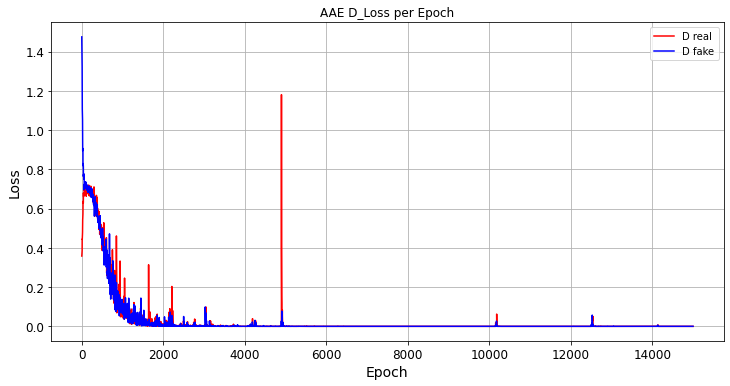

G_Loss: 


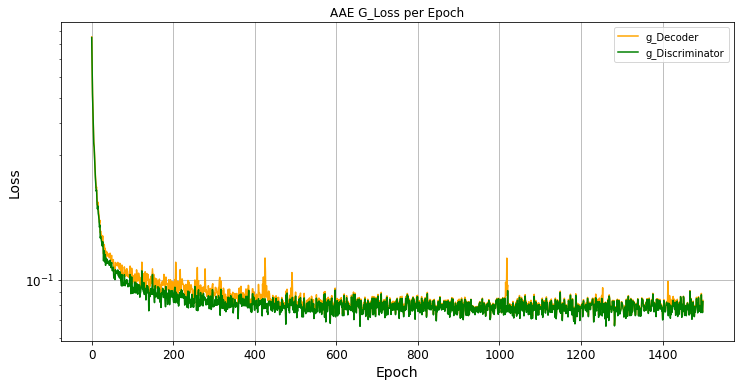

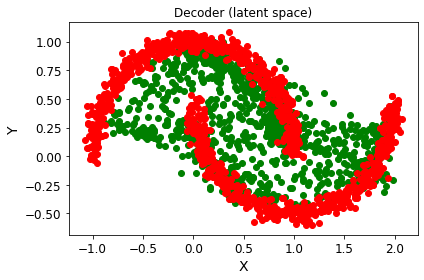

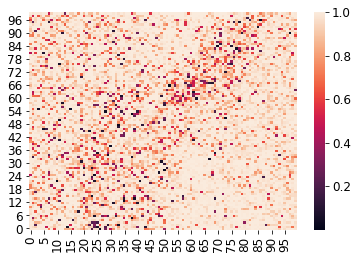

1501 [D real: 0.056991, D fake: 0.005767], [Enc/Dec loss: 0.079515, Enc/Dis: 0.078641]
1502 [D real: 0.037268, D fake: 0.004021], [Enc/Dec loss: 0.079439, Enc/Dis: 0.078457]
1503 [D real: 0.028672, D fake: 0.003625], [Enc/Dec loss: 0.082457, Enc/Dis: 0.081370]
1504 [D real: 0.027108, D fake: 0.003404], [Enc/Dec loss: 0.079310, Enc/Dis: 0.078209]
1505 [D real: 0.049784, D fake: 0.005252], [Enc/Dec loss: 0.088778, Enc/Dis: 0.087822]
1506 [D real: 0.044259, D fake: 0.005543], [Enc/Dec loss: 0.079854, Enc/Dis: 0.078888]
1507 [D real: 0.042597, D fake: 0.007475], [Enc/Dec loss: 0.078298, Enc/Dis: 0.077417]
1508 [D real: 0.038301, D fake: 0.007843], [Enc/Dec loss: 0.074257, Enc/Dis: 0.073390]
1509 [D real: 0.035039, D fake: 0.012046], [Enc/Dec loss: 0.080755, Enc/Dis: 0.079638]
1510 [D real: 0.031714, D fake: 0.013970], [Enc/Dec loss: 0.075910, Enc/Dis: 0.074819]
1511 [D real: 0.019737, D fake: 0.013668], [Enc/Dec loss: 0.075597, Enc/Dis: 0.074497]
1512 [D real: 0.025905, D fake: 0.018085], 

1596 [D real: 0.008670, D fake: 0.012205], [Enc/Dec loss: 0.082776, Enc/Dis: 0.080998]
1597 [D real: 0.020965, D fake: 0.011031], [Enc/Dec loss: 0.078720, Enc/Dis: 0.077290]
1598 [D real: 0.020600, D fake: 0.010426], [Enc/Dec loss: 0.079336, Enc/Dis: 0.077477]
1599 [D real: 0.019284, D fake: 0.009601], [Enc/Dec loss: 0.082355, Enc/Dis: 0.080624]
1600 [D real: 0.018165, D fake: 0.011782], [Enc/Dec loss: 0.074635, Enc/Dis: 0.073079]
1601 [D real: 0.001882, D fake: 0.004607], [Enc/Dec loss: 0.084592, Enc/Dis: 0.083126]
1602 [D real: 0.005057, D fake: 0.026350], [Enc/Dec loss: 0.081070, Enc/Dis: 0.079731]
1603 [D real: 0.004150, D fake: 0.021309], [Enc/Dec loss: 0.079977, Enc/Dis: 0.078529]
1604 [D real: 0.007119, D fake: 0.019966], [Enc/Dec loss: 0.076210, Enc/Dis: 0.074923]
1605 [D real: 0.006387, D fake: 0.023539], [Enc/Dec loss: 0.080146, Enc/Dis: 0.078848]
1606 [D real: 0.006219, D fake: 0.020365], [Enc/Dec loss: 0.081860, Enc/Dis: 0.080457]
1607 [D real: 0.008993, D fake: 0.017871], 

1691 [D real: 0.004880, D fake: 0.016710], [Enc/Dec loss: 0.083537, Enc/Dis: 0.082605]
1692 [D real: 0.005092, D fake: 0.013329], [Enc/Dec loss: 0.081686, Enc/Dis: 0.080809]
1693 [D real: 0.004318, D fake: 0.010952], [Enc/Dec loss: 0.086333, Enc/Dis: 0.085345]
1694 [D real: 0.004309, D fake: 0.008692], [Enc/Dec loss: 0.069726, Enc/Dis: 0.068814]
1695 [D real: 0.005353, D fake: 0.010271], [Enc/Dec loss: 0.079716, Enc/Dis: 0.078984]
1696 [D real: 0.007306, D fake: 0.010498], [Enc/Dec loss: 0.079672, Enc/Dis: 0.078927]
1697 [D real: 0.007022, D fake: 0.009171], [Enc/Dec loss: 0.073736, Enc/Dis: 0.073095]
1698 [D real: 0.006477, D fake: 0.008157], [Enc/Dec loss: 0.077038, Enc/Dis: 0.076134]
1699 [D real: 0.006120, D fake: 0.007518], [Enc/Dec loss: 0.076915, Enc/Dis: 0.076109]
1700 [D real: 0.006762, D fake: 0.006992], [Enc/Dec loss: 0.080629, Enc/Dis: 0.079700]
1701 [D real: 0.004087, D fake: 0.006539], [Enc/Dec loss: 0.081558, Enc/Dis: 0.080890]
1702 [D real: 0.004069, D fake: 0.004048], 

1786 [D real: 0.002680, D fake: 0.004447], [Enc/Dec loss: 0.078839, Enc/Dis: 0.077275]
1787 [D real: 0.002699, D fake: 0.005112], [Enc/Dec loss: 0.076791, Enc/Dis: 0.074105]
1788 [D real: 0.003136, D fake: 0.004648], [Enc/Dec loss: 0.089714, Enc/Dis: 0.080449]
1789 [D real: 0.003128, D fake: 0.004325], [Enc/Dec loss: 0.085741, Enc/Dis: 0.077439]
1790 [D real: 0.003247, D fake: 0.004189], [Enc/Dec loss: 0.074089, Enc/Dis: 0.069355]
1791 [D real: 0.001653, D fake: 0.008177], [Enc/Dec loss: 0.082340, Enc/Dis: 0.079838]
1792 [D real: 0.012920, D fake: 0.005923], [Enc/Dec loss: 0.080594, Enc/Dis: 0.078443]
1793 [D real: 0.009622, D fake: 0.021755], [Enc/Dec loss: 0.080092, Enc/Dis: 0.078126]
1794 [D real: 0.013270, D fake: 0.025176], [Enc/Dec loss: 0.083918, Enc/Dis: 0.082069]
1795 [D real: 0.012748, D fake: 0.023287], [Enc/Dec loss: 0.078416, Enc/Dis: 0.076272]
1796 [D real: 0.011496, D fake: 0.019792], [Enc/Dec loss: 0.077763, Enc/Dis: 0.075843]
1797 [D real: 0.010338, D fake: 0.017016], 

1881 [D real: 0.002174, D fake: 0.005001], [Enc/Dec loss: 0.080517, Enc/Dis: 0.078345]
1882 [D real: 0.001612, D fake: 0.003604], [Enc/Dec loss: 0.083432, Enc/Dis: 0.081204]
1883 [D real: 0.005680, D fake: 0.004041], [Enc/Dec loss: 0.087808, Enc/Dis: 0.085421]
1884 [D real: 0.004436, D fake: 0.005098], [Enc/Dec loss: 0.077359, Enc/Dis: 0.076208]
1885 [D real: 0.004163, D fake: 0.004709], [Enc/Dec loss: 0.079046, Enc/Dis: 0.078136]
1886 [D real: 0.004547, D fake: 0.006684], [Enc/Dec loss: 0.079196, Enc/Dis: 0.078238]
1887 [D real: 0.004025, D fake: 0.007667], [Enc/Dec loss: 0.070005, Enc/Dis: 0.069045]
1888 [D real: 0.004310, D fake: 0.013466], [Enc/Dec loss: 0.074138, Enc/Dis: 0.072815]
1889 [D real: 0.005979, D fake: 0.012354], [Enc/Dec loss: 0.082103, Enc/Dis: 0.080991]
1890 [D real: 0.005602, D fake: 0.011247], [Enc/Dec loss: 0.073501, Enc/Dis: 0.072433]
1891 [D real: 0.003952, D fake: 0.001090], [Enc/Dec loss: 0.082924, Enc/Dis: 0.081917]
1892 [D real: 0.003220, D fake: 0.000886], 

1976 [D real: 0.003908, D fake: 0.005644], [Enc/Dec loss: 0.081700, Enc/Dis: 0.080967]
1977 [D real: 0.003438, D fake: 0.004976], [Enc/Dec loss: 0.080899, Enc/Dis: 0.080209]
1978 [D real: 0.003232, D fake: 0.004449], [Enc/Dec loss: 0.078369, Enc/Dis: 0.077561]
1979 [D real: 0.003413, D fake: 0.004053], [Enc/Dec loss: 0.078854, Enc/Dis: 0.077839]
1980 [D real: 0.003245, D fake: 0.004056], [Enc/Dec loss: 0.076757, Enc/Dis: 0.075840]
1981 [D real: 0.005838, D fake: 0.001401], [Enc/Dec loss: 0.080237, Enc/Dis: 0.079319]
1982 [D real: 0.004091, D fake: 0.002181], [Enc/Dec loss: 0.086723, Enc/Dis: 0.085898]
1983 [D real: 0.004486, D fake: 0.001656], [Enc/Dec loss: 0.080618, Enc/Dis: 0.079831]
1984 [D real: 0.004258, D fake: 0.003655], [Enc/Dec loss: 0.081749, Enc/Dis: 0.080805]
1985 [D real: 0.004415, D fake: 0.004108], [Enc/Dec loss: 0.075664, Enc/Dis: 0.074717]
1986 [D real: 0.003856, D fake: 0.003472], [Enc/Dec loss: 0.075214, Enc/Dis: 0.074134]
1987 [D real: 0.003422, D fake: 0.003060], 

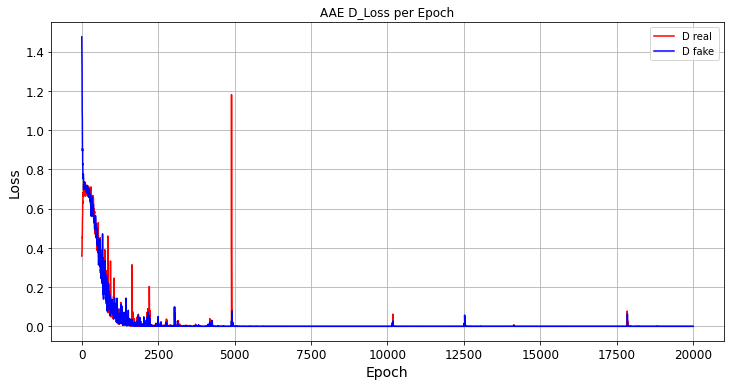

G_Loss: 


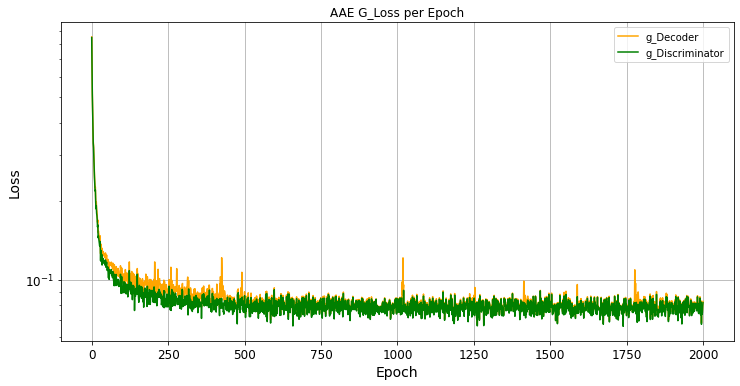

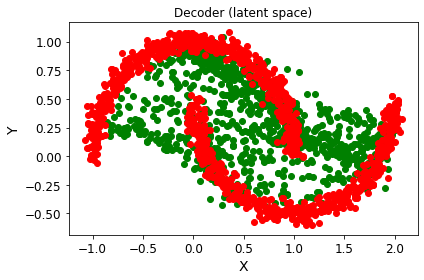

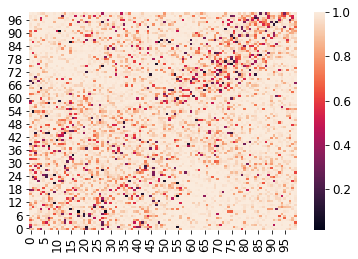

In [10]:
hist = aae.train(i, Z, batch_size, train_dataset, epochs, scaler, X_train_scaled, scaled, X_train, y_train )


### Plot Loss

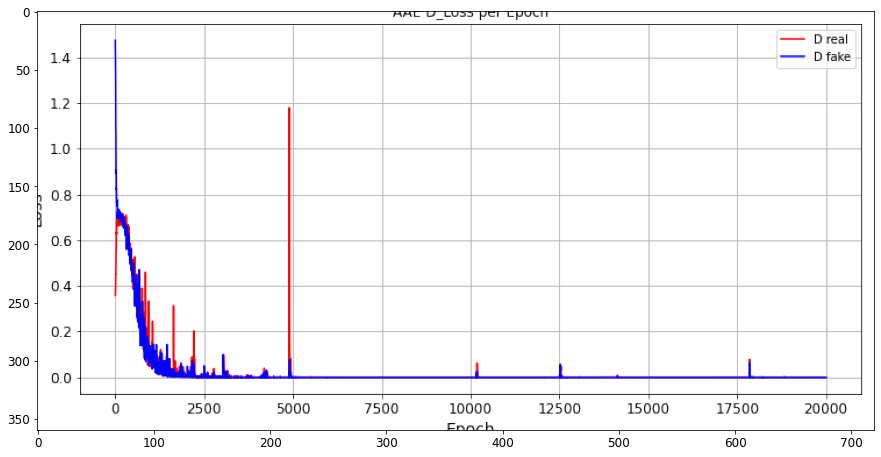

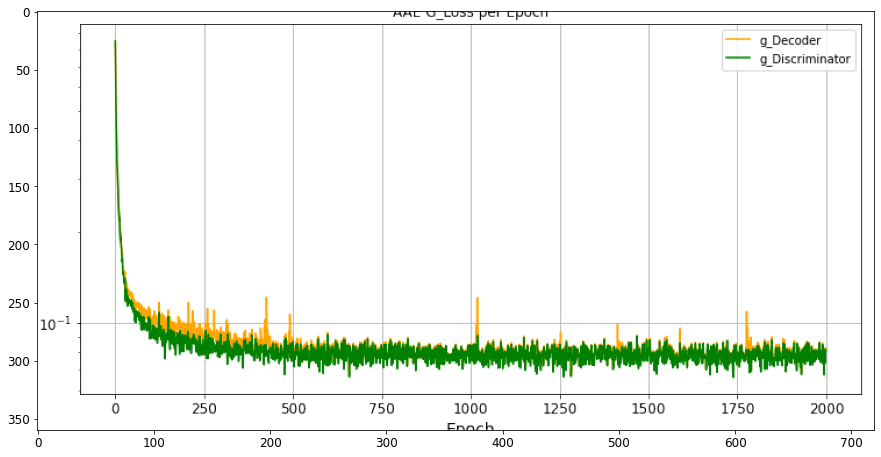

In [11]:
from PIL import Image

#Discriminator Loss
Dloss = Image.open('AAE/Losses/D_loss_v'+str(i)+'_epochs'+str(epochs)+'.png')
plt.figure("D_loss",figsize=[15,10])
plt.imshow(Dloss)
#Encoder Loss
Gloss = Image.open('AAE/Losses/G_loss_v'+str(i)+'_epochs'+str(epochs)+'.png')
plt.figure("G_loss",figsize=[15,10])
plt.imshow(Gloss)


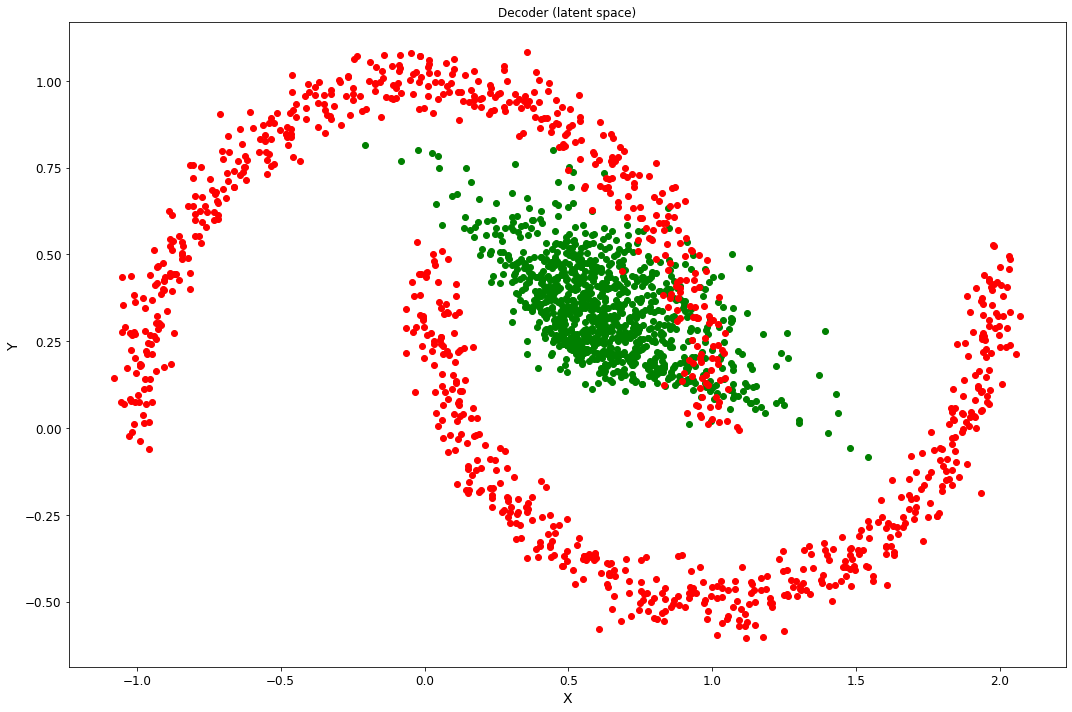

In [12]:
latent_values = tf.random.normal([1000, Z])
predicted_values = decoder(latent_values)

predicted_values2 = decoder(encoder(X_train_scaled))
predicted_values3 = encoder(X_train_scaled)
        

predicted_values = scaler.inverse_transform(predicted_values)
predicted_values2 = scaler.inverse_transform(predicted_values2)
predicted_values4 = scaler.inverse_transform(X_train_scaled)

            
fig, axes = plt.subplots(figsize=(15,10))
plt.scatter(predicted_values[:,0],predicted_values[:,1],c='green') #decoder(latent space)
plt.scatter(X_train, y_train,c='r')#X_trained_scaled
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Decoder (latent space)')
    
plt.tight_layout()
plt.savefig('AAE/Result/moons_v_'+str(i)+'_epochs_'+str(epochs)+'.png')
plt.show()

## predict from the decoder

In [13]:
epochs = epochs

### Applying the prediction function

In [14]:
i = i

In [15]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model, load_model


import random

import sys
sys.path.append("..")

import dataset, network

In [16]:
epochs = epochs

In [17]:
encoder = keras.models.load_model('./AAE/Models/encoder_v'+str(i)+'_'+str(epochs))
decoder = keras.models.load_model('./AAE/Models/decoder_v'+str(i)+'_'+str(epochs))
discriminator = keras.models.load_model('./AAE/Models/discriminator_v'+str(i)+'_'+str(epochs))


input_test : (700, 2)


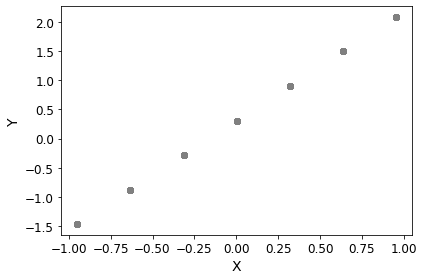

In [18]:
# define these for desired prediction
x_input = [-1.0,-0.5,0,0.5,1.0,1.5,2.0]
n_points = 700
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//7, n_features), x_input[0])
predict2 = np.full((n_points//7, n_features), x_input[1])
predict3 = np.full((n_points//7, n_features), x_input[2])
predict4 = np.full((n_points//7, n_features), x_input[3])
predict5 = np.full((n_points//7, n_features), x_input[4])
predict6 = np.full((n_points//7, n_features), x_input[5])
predict7 = np.full((n_points//7, n_features), x_input[6])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7))
predictthis = scaler.transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()

In [19]:
X_generated = aae.predict(input_test, scaler)
print("X_generated :",X_generated.shape)

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

Generated Data: (699, 2)


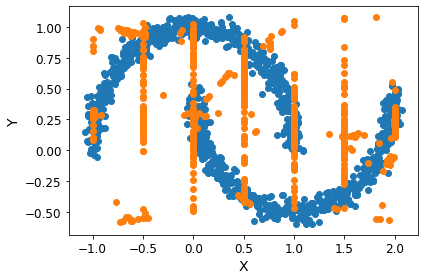

In [20]:
if scenario in ("3d", "helix"):
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')


    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train) 
    plt.scatter(X_generated[:,0],X_generated[:,1])
    #plt.scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    #plt.scatter(predicted_values2[:,0],predicted_values2[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    plt.savefig('AAE/Prediction/moons'+str(epochs)+'.png')
    